#**Step 1: Install Required Libraries**

In [10]:
pip install pandas scikit-learn xgboost

In [30]:
pip install seaborn matplotlib

In [21]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#**Step 2: Generate Sample Data**

In [22]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(42)

# Generate sample data
def generate_data(num_transactions=1000):
    start_date = datetime(2022, 1, 1)
    end_date = datetime(2022, 12, 31)

    date_list = [start_date + timedelta(days=np.random.randint((end_date - start_date).days)) for _ in range(num_transactions)]
    amount_list = np.random.uniform(10, 1000, num_transactions)
    merchant_list = np.random.choice(['Amazon', 'eBay', 'Walmart', 'Best Buy'], num_transactions)
    category_list = np.random.choice(['Electronics', 'Clothing', 'Books', 'Groceries'], num_transactions)
    is_fraud_list = np.random.choice([0, 1], num_transactions, p=[0.95, 0.05])

    data = pd.DataFrame({
        'TransactionDate': date_list,
        'Amount': amount_list,
        'Merchant': merchant_list,
        'Category': category_list,
        'IsFraud': is_fraud_list
    })

    return data

# Generate 1000 transactions for demonstration
transaction_data = generate_data(1000)
transaction_data.to_csv('transaction_data.csv', index=False)

#**Step 3: Load the data**

In [15]:
data = pd.read_csv('transaction_data.csv')

#**Step 4: Convert 'TransactionDate' to DateTime**

In [16]:
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

# **Step 5: Extract Features from DateTime**

In [20]:
data['Day'] = data['TransactionDate'].dt.day
data['Month'] = data['TransactionDate'].dt.month
data['Year'] = data['TransactionDate'].dt.year

# **Step 6: Drop the Original DateTime Column**

In [23]:
data = data.drop('TransactionDate', axis=1)

# **Step 7: Convert categorical variables to numerical using one-hot encoding**

In [24]:
data = pd.get_dummies(data, columns=['Merchant', 'Category'], drop_first=True)

# **Step 8: Split the data into features and target variable**

In [25]:
X = data.drop('IsFraud', axis=1)
y = data['IsFraud']

# **Step 9: Train-Test Split**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# **Step 10: Build and Train the Model**

In [27]:
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# **Step 11: Make predictions on the test set**

In [28]:
y_pred = model.predict(X_test)


# **Step 12: Evaluate the model**

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.96
Confusion Matrix:
 [[191   1]
 [  7   1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       192
           1       0.50      0.12      0.20         8

    accuracy                           0.96       200
   macro avg       0.73      0.56      0.59       200
weighted avg       0.95      0.96      0.95       200



#**Step 13: visualize the results using a confusion matrix**

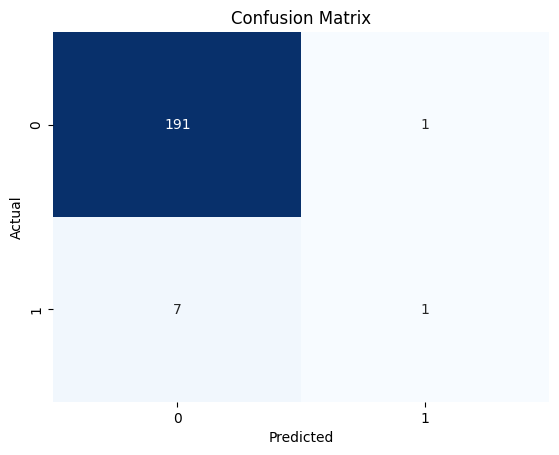

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#  Evaluate the model
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()